In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
print(tf.__version__)

2.10.1


In [3]:
X_train = np.loadtxt(r'E:\extract\Image\input.csv',delimiter=',')
Y_train = np.loadtxt(r'E:\extract\Image\labels.csv',delimiter=',')
X_test = np.loadtxt(r'E:\extract\Image\input_test.csv',delimiter=',')
Y_test = np.loadtxt(r'E:\extract\Image\labels_test.csv',delimiter=',')

In [4]:
X_test.shape

(400, 30000)

In [5]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
X_test.shape

(400, 100, 100, 3)

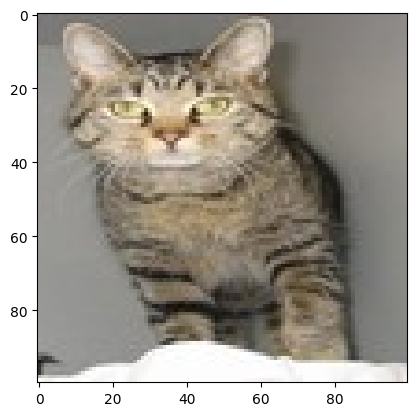

In [7]:
i=random.randint(0,len(X_train))
plt.imshow(X_train[i])
plt.show()

In [8]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [11]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 18s 514ms/step - loss: 0.7325 - accuracy: 0.5300
Epoch 2/10
32/32 [==============================] - 16s 503ms/step - loss: 0.6645 - accuracy: 0.6065
Epoch 3/10
32/32 [==============================] - 19s 607ms/step - loss: 0.6117 - accuracy: 0.6710
Epoch 4/10
32/32 [==============================] - 19s 597ms/step - loss: 0.5493 - accuracy: 0.7325
Epoch 5/10
32/32 [==============================] - 19s 596ms/step - loss: 0.4691 - accuracy: 0.7775
Epoch 6/10
32/32 [==============================] - 19s 593ms/step - loss: 0.3873 - accuracy: 0.8300
Epoch 7/10
32/32 [==============================] - 20s 625ms/step - loss: 0.3384 - accuracy: 0.8485
Epoch 8/10
32/32 [==============================] - 21s 650ms/step - loss: 0.2526 - accuracy: 0.8910
Epoch 9/10
32/32 [==============================] - 19s 600ms/step - loss: 0.1901 - accuracy: 0.9355
Epoch 10/10
32/32 [==============================] - 20s 618ms/step - loss: 0.1386 - accura

In [12]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 2s 96ms/step - loss: 0.8861 - accuracy: 0.6725


[0.8861390948295593, 0.6725000143051147]

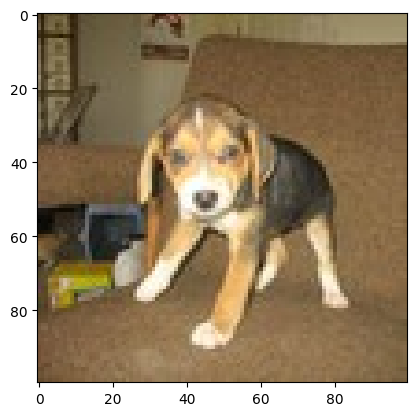

1/1 [==============================] - 0s 90ms/step
[[0.03691296]]
The given image is: dog


In [26]:
i=random.randint(0,len(X_test))
plt.imshow(X_test[i])
plt.show()

y_pred=model.predict(X_test[i].reshape(1,100,100,3))
print(y_pred)

if(y_pred < 0.5):
    pred='dog'

if(y_pred > 0.5):
    pred='cat'

print('The given image is:',pred)

In [46]:
import kerastuner
from tensorflow import keras

In [30]:
fash_mnist = keras.datasets.fashion_mnist

In [31]:
(tr_img,tr_label),(tt_img,tt_label)=fash_mnist.load_data()

In [34]:
tt_img.shape

(10000, 28, 28)

In [35]:
tr_img=tr_img/255.0
tt_img=tt_img/255.0

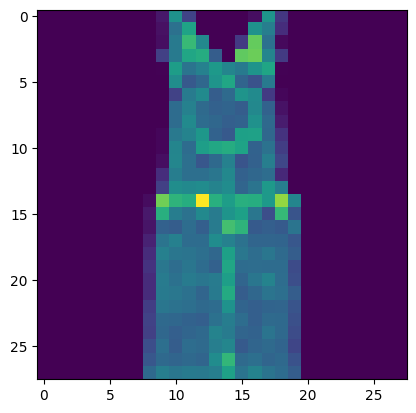

In [51]:
i=random.randint(0,len(tr_img))
plt.imshow(tr_img[i])
plt.show()

In [45]:
tr_img=tr_img.reshape(len(tr_img),28,28,1)
tt_img=tt_img.reshape(len(tt_img),28,28,1)

In [61]:
#https://keras.io/keras_tuner/
def build_model(hp):
    model=keras.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Int('conv_1',min_value=32,
                                                 max_value=128,step=16),
                                kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
                                activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.Conv2D(filters=hp.Int('conv_2',min_value=32,
                                                 max_value=128,step=16),
                                kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
                                activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int('dense_1', min_value=32, max_value=128, step=16),
                                 activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))


    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [57]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [62]:
tuner=RandomSearch(build_model,objective='val_accuracy',
                   max_trials=5)

In [63]:
tuner.search(tr_img,tr_label,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 28m 04s]
val_accuracy: 0.9108333587646484

Best val_accuracy So Far: 0.9108333587646484
Total elapsed time: 01h 44m 36s
INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1: 80
conv_1_kernel: 3
conv_2: 80
conv_2_kernel: 5
dense_1: 80
learning_rate: 0.001
Score: 0.9108333587646484
Trial summary
Hyperparameters:
conv_1: 32
conv_1_kernel: 5
conv_2: 80
conv_2_kernel: 5
dense_1: 112
learning_rate: 0.001
Score: 0.9081666469573975
Trial summary
Hyperparameters:
conv_1: 64
conv_1_kernel: 5
conv_2: 96
conv_2_kernel: 5
dense_1: 48
learning_rate: 0.001
Score: 0.9024999737739563
Trial summary
Hyperparameters:
conv_1: 112
conv_1_kernel: 3
conv_2: 80
conv_2_kernel: 3
dense_1: 64
learning_rate: 0.01
Score: 0.8853333592414856
Trial summary
Hyperparameters:
conv_1: 80
conv_1_kernel: 3
conv_2: 112
conv_2_kernel: 5
dense_1: 128
learning_rate: 0.01
Score: 0.8633333444595337


In [65]:
model=tuner.get_best_models(num_models=1)[0]

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 80)        800       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 80)        160080    
                                                                 
 flatten (Flatten)           (None, 38720)             0         
                                                                 
 dense (Dense)               (None, 80)                3097680   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 3,259,370
Trainable params: 3,259,370
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(tr_img, tr_label, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 437s 258ms/step - loss: 0.1822 - accuracy: 0.9322 - val_loss: 0.2824 - val_accuracy: 0.9062
Epoch 5/10
1688/1688 [==============================] - 474s 281ms/step - loss: 0.1332 - accuracy: 0.9506 - val_loss: 0.2604 - val_accuracy: 0.9135
Epoch 6/10
1688/1688 [==============================] - 475s 281ms/step - loss: 0.0957 - accuracy: 0.9640 - val_loss: 0.3030 - val_accuracy: 0.9103
Epoch 7/10
1688/1688 [==============================] - 482s 286ms/step - loss: 0.0665 - accuracy: 0.9753 - val_loss: 0.3210 - val_accuracy: 0.9140
Epoch 8/10
1688/1688 [==============================] - 412s 244ms/step - loss: 0.0515 - accuracy: 0.9810 - val_loss: 0.3967 - val_accuracy: 0.9125
Epoch 9/10
1688/1688 [==============================] - 383s 227ms/step - loss: 0.0383 - accuracy: 0.9861 - val_loss: 0.4256 - val_accuracy: 0.9130
Epoch 10/10
1688/1688 [==============================] - 385s 228ms/step - loss: 0.0303 - accuracy: 0.9893 - val

In [105]:
model.evaluate(tt_img,tt_label)

313/313 [==============================] - 27s 70ms/step - loss: 0.5378 - accuracy: 0.9060


[0.5378360152244568, 0.906000018119812]

In [93]:
new_label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

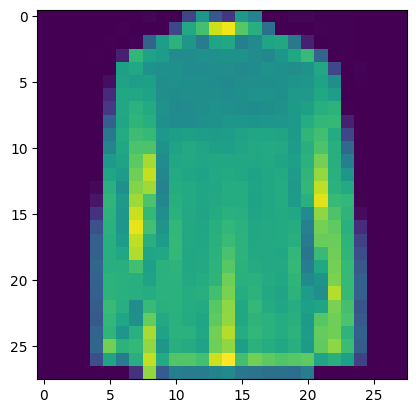

1/1 [==============================] - 3s 3s/step
Shirt


In [110]:
i=random.randint(0,len(tt_img))
plt.imshow(tt_img[i])
plt.show()

y_pred=model.predict(tt_img[i].reshape(1,28,28,1))
print(new_label[np.argmax(y_pred)])